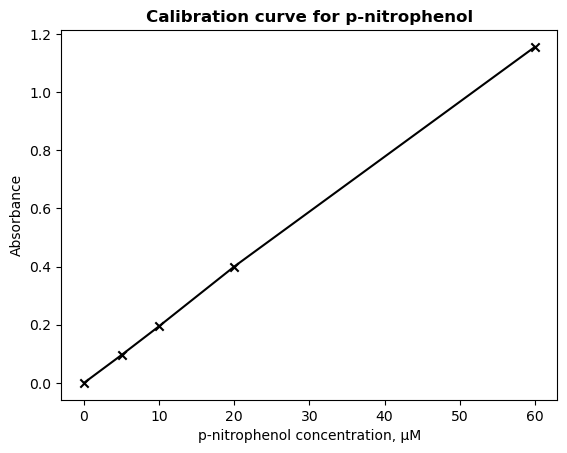

In [2]:
import matplotlib.pyplot as plt 
import numpy as np


DATA1 = np.row_stack([[0, 5, 10, 20, 60], [0, 0.096, 0.195, 0.400, 1.155]])

DATA2 = np.row_stack([[3.0, 4.0, 5.0, 6.0, 7.0], [0.311, 0.532, 0.908, 0.933, 0.388]])

DATA3 = np.row_stack([[0.1, 0.4, 2.0, 4.0, 6.0],
                      [1.5, 4.1, 11.9, 16.5, 18.6],
                      [8.8, 17.0, 26.3, 26.3, 25.3]])

DATA4 = np.row_stack([[288, 293, 298, 303, 308, 313],
                      [5.67, 8.76, 9.79, 20.1, 29.9, 35.6],
                      [0.495, 0.598, 0.288, 0.805, 0.702, 1.42]])


plt.scatter(DATA1[0], DATA1[1], color = 'black', marker='x')
plt.plot(DATA1[0], DATA1[1], color = 'black')
plt.title('Calibration curve for p-nitrophenol', fontweight='bold')
plt.xlabel('p-nitrophenol concentration, µM')
plt.ylabel('Absorbance')
plt.savefig('Calibration_Curve.png')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import skewnorm

def gaussian_fit(pH, rate):
    # Define a skewed Gaussian function
    def skewed_gaussian(x, a, mean, std, skew):
        return a * skewnorm.pdf(x, skew, loc=mean, scale=std)

    # Initial parameter guesses
    initial_guesses = [max(rate), np.mean(pH), np.std(pH), 0.5]  # Adjusted initial guesses

    # Parameter bounds
    lower_bounds = [0, min(pH), 0, -10]  # Lower bounds for parameters
    upper_bounds = [np.inf, max(pH), np.inf, 10]  # Upper bounds for parameters
    bounds = (lower_bounds, upper_bounds)

    # Fit the skewed Gaussian function to the data
    popt, pcov = curve_fit(skewed_gaussian, pH, rate, p0=initial_guesses, bounds=bounds)

    # Generate pH values for plotting
    pH_values = np.linspace(min(pH), max(pH), 100)

    # Plot the fitted curve
    plt.plot(pH_values, skewed_gaussian(pH_values, *popt), color="black", label='Skewed Gaussian Fit')
    plt.legend()

    return popt


x = DATA1[0]
y = DATA1[1]
coefficients = np.polyfit(x, y, 1)
print(coefficients)
concentration_change = ((DATA2[1] - coefficients[1]) / coefficients[0]) * 2
print(concentration_change)
pH = DATA2[0] 
rate = concentration_change/40
print(rate)

[0.01924828 0.00348276]
[31.95270512 54.91580079 93.98423504 96.5818703  39.95342171]
[0.79881763 1.37289502 2.34960588 2.41454676 0.99883554]


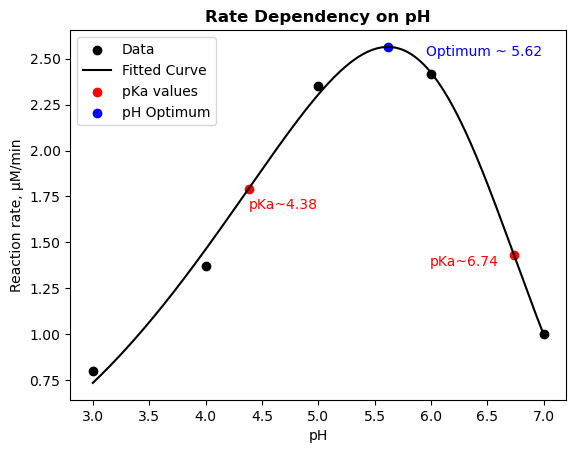

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import skewnorm

# Skewed Gaussian function
def skewed_gaussian(x, a, mean, std, skew):
    return a * skewnorm.pdf(x, skew, loc=mean, scale=std)

# Fit the skewed Gaussian function to the data
popt, pcov = curve_fit(skewed_gaussian, pH, rate)

# Generate finer pH values for plotting the fitted curve
pH_finer = np.linspace(min(pH), max(pH), 1000)
rate_fitted = skewed_gaussian(pH_finer, *popt)

# Calculate the second derivative
dx = pH_finer[1] - pH_finer[0]
d2rate_dx2 = np.gradient(np.gradient(rate_fitted, dx), dx)

# Find the indices where the second derivative crosses zero
inflection_indices = np.where(np.diff(np.sign(d2rate_dx2)))[0] + 1  # Adding 1 to get the correct index

# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(pH, rate, marker='o', color='black')
# plt.xlabel('pH')
# plt.ylabel('Reaction Rate, µM/min')
# plt.title('Rate Dependency on pH', fontweight='bold')

# plt.subplot(1, 2, 2)
plt.scatter(pH, rate, color='black', label='Data')
plt.plot(pH_finer, rate_fitted, color='black', label='Fitted Curve')
plt.scatter(pH_finer[inflection_indices], rate_fitted[inflection_indices], color='red', label='pKa values')
plt.xlabel('pH')
plt.ylabel('Reaction rate, µM/min')
plt.title('Rate Dependency on pH', fontweight='bold')

# Annotate pKa values
for i, idx in enumerate(inflection_indices):
    if i == 0:
        plt.text(pH_finer[idx], rate_fitted[idx] - 0.05, f'pKa~{pH_finer[idx]:.2f}', fontsize=10, color='red', verticalalignment='top')
    else:
        plt.text(pH_finer[idx] - 0.75, rate_fitted[idx], f'pKa~{pH_finer[idx]:.2f}', fontsize=10, color='red', verticalalignment='top')
pH_optimum = pH_finer[np.argmax(rate_fitted)]
plt.scatter(pH_optimum, max(rate_fitted), color = 'blue', label = 'pH Optimum')
plt.text(pH_optimum + 0.85, max(rate_fitted)-0.05, f'Optimum ~ {pH_optimum:.2f}', fontsize=10, color='blue', horizontalalignment='center')
plt.legend()
plt.savefig('pH-dependence.png')
plt.show()


[0.754209960587596, 2.5725546399140016, 8.495163024005723, 13.06700107488354, 15.924399856682177]
[3.50770333213901, 9.222500895736285, 17.63883912576136, 22.83410963812252, 24.756359727696147]
[0.10056133 0.34300729 1.1326884  1.74226681 2.12325331]
[0.46769378 1.22966679 2.35184522 3.04454795 3.30084796]
Michaelis-Menten Parameters:
Non-Inhibitory: [  3.69443655 299.37657541]
Inhibitory: [   3.64457342 1446.46269243]
Lineweaver-burk params:
Non-inhibitory: [199.88935842   3.2548882 ]
Inhibitory: [833.97668224   2.60814274]


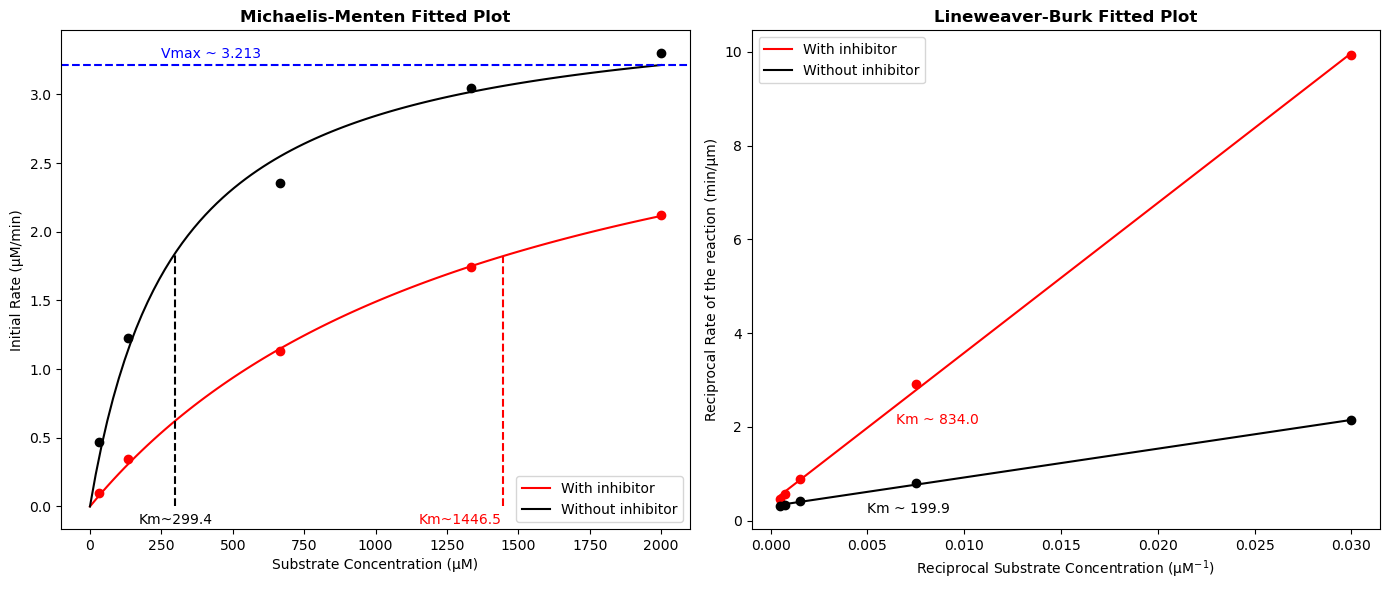

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Experimental data
abs_inh = [0.018, 0.053, 0.167, 0.255, 0.310]
abs_non_inh = [0.071, 0.181, 0.343, 0.443, 0.480]
substrate_conc_mM = [0.1, 0.4, 2.0, 4.0, 6.0]

# Divide all substrate concentrations by 3
substrate_conc_mM = [(conc * 1000) / 3 for conc in substrate_conc_mM]

conc_inh = [(value - coefficients[1]) / coefficients[0] for value in abs_inh]
conc_non_inh = [(value - coefficients[1]) / coefficients[0] for value in abs_non_inh]
print(conc_inh)
print(conc_non_inh)
# Data matrix
DATA3 = np.row_stack([substrate_conc_mM, conc_inh, conc_non_inh])

# Initial rates (based on concentrations)
initial_rate_inhib = (np.array(conc_inh) / 7.5) 
initial_rate_non_inhib = (np.array(conc_non_inh) / 7.5) 
print(initial_rate_inhib)
print(initial_rate_non_inhib)
# Define Michaelis-Menten function
def michaelis_menten(substrate_conc, Vmax, Km):
    return (Vmax * substrate_conc) / (Km + substrate_conc)

# Fit Michaelis-Menten model to the data
params_non_inhib, _ = curve_fit(michaelis_menten, substrate_conc_mM, initial_rate_non_inhib)
params_inhib, _ = curve_fit(michaelis_menten, substrate_conc_mM, initial_rate_inhib)
print('Michaelis-Menten Parameters:')
print("Non-Inhibitory:", params_non_inhib)
print("Inhibitory:", params_inhib)
# Generate curve fits
fit_substrate = np.linspace(0, max(substrate_conc_mM), 100)
fit_rate_non_inhib = michaelis_menten(fit_substrate, *params_non_inhib)
fit_rate_inhib = michaelis_menten(fit_substrate, *params_inhib)

# Extract Km values
Km_inhib = params_inhib[1]
Km_non_inhib = params_non_inhib[1]

# Plotting
plt.figure(figsize=(14, 6))  # Adjust figure size

# Michaelis-Menten Fitted Plot
plt.subplot(1, 2, 1)
plt.plot(fit_substrate, fit_rate_inhib, color='red', label='With inhibitor')
plt.plot(fit_substrate, fit_rate_non_inhib, color='black', label='Without inhibitor')
plt.scatter(substrate_conc_mM, initial_rate_inhib, color='red')
plt.scatter(substrate_conc_mM, initial_rate_non_inhib, color='black')
plt.axhline(y=fit_rate_non_inhib[-1], color = 'blue', linestyle='--')
plt.text(250, fit_rate_non_inhib[-1] + 0.05, f'Vmax ~ {fit_rate_non_inhib[-1]:.3f}', color = 'blue')
plt.title('Michaelis-Menten Fitted Plot', fontweight = 'bold')
plt.legend()
plt.xlabel('Substrate Concentration (µM)')
plt.ylabel('Initial Rate (µM/min)')

# Indicating Km values
plt.plot([Km_inhib, Km_inhib], [0, params_inhib[0]/2], color='red', linestyle='--')
plt.plot([Km_non_inhib, Km_non_inhib], [0, params_non_inhib[0]/2], color='black', linestyle='--')
plt.text(Km_inhib-150, -0.15, f'Km~{Km_inhib:.1f}', color='red', verticalalignment='bottom', horizontalalignment='center')
plt.text(Km_non_inhib, -0.15, f'Km~{Km_non_inhib:.1f}', color='black', verticalalignment='bottom', horizontalalignment='center')



# Calculate reciprocal initial reaction rates
rec_initial_rate_inhib = 1 / initial_rate_inhib
rec_initial_rate_non_inhib = 1 / initial_rate_non_inhib

# Calculate reciprocal substrate concentration
rec_substrate_conc = [1/ value for value in substrate_conc_mM]

# Define Lineweaver-Burk function
def lineweaver_burk(rec_substrate_conc, Km, Vmax):
    return (Km/Vmax) * rec_substrate_conc + 1/Vmax

# Fit Lineweaver-Burk model to the filtered data
params_non_inhib, _ = curve_fit(lineweaver_burk, rec_substrate_conc, rec_initial_rate_non_inhib)
params_inhib, _ = curve_fit(lineweaver_burk, rec_substrate_conc, rec_initial_rate_inhib)
print('Lineweaver-burk params:')
print('Non-inhibitory:', params_non_inhib)
print('Inhibitory:', params_inhib)

Km_Vmax_inhib = params_inhib[0]/params_inhib[1]
Km_Vmax_non_inhib = params_non_inhib[0]/params_non_inhib[1]

# Generate curve fits
fit_rec_substrate_conc = np.linspace(min(rec_substrate_conc), max(rec_substrate_conc), 100)
fit_rec_initial_rate_non_inhib = lineweaver_burk(fit_rec_substrate_conc, *params_non_inhib)
fit_rec_initial_rate_inhib = lineweaver_burk(fit_rec_substrate_conc, *params_inhib)

# Plotting
plt.subplot(1, 2, 2)
plt.plot(fit_rec_substrate_conc, fit_rec_initial_rate_inhib, color='red', label='With inhibitor')
plt.plot(fit_rec_substrate_conc, fit_rec_initial_rate_non_inhib, color='black', label='Without inhibitor')
plt.scatter(rec_substrate_conc, rec_initial_rate_inhib, color='red', marker='o')
plt.scatter(rec_substrate_conc, rec_initial_rate_non_inhib, color='black', marker='o')

plt.text(0.005, 0.1, f'Km ~ {params_non_inhib[0]:.1f}', color='black', verticalalignment='bottom')
plt.text(0.0065, 2, f'Km ~ {params_inhib[0]:.1f}', color='red', verticalalignment='bottom')

plt.title('Lineweaver-Burk Fitted Plot', fontweight='bold')
plt.xlabel('Reciprocal Substrate Concentration (µM$^{-1}$)')
plt.ylabel('Reciprocal Rate of the reaction (min/µm)')
plt.legend()



plt.tight_layout()
plt.savefig('MM-LB.png')
plt.show()


In [6]:
import pandas as pd

enz_conc_mass = 24.5

enz_weight = 150000

data = pd.read_excel('C:\\Users\\golov\\OneDrive - Imperial College London\\Year 1\\Lab Reports\\Enzyme Kinetics\\Enzyme_Kinetics_Lab_exp4.xlsx')


df = data.set_index('Temperature (K)')

df['Abs'] = df['Absorbance with enzyme (OD)'] - df['Absorbance without enzyme (OD)']
df


,Absorbance with enzyme (OD),Absorbance without enzyme (OD),Abs
Temperature (K),,,
288,0.110,0.010,0.100
293,0.170,0.012,0.158
298,0.190,0.006,0.184
303,0.388,0.016,0.372
308,0.576,0.014,0.562
313,0.690,0.028,0.662


In [7]:

x = DATA1[0]
y = DATA1[1]
coefficients = np.polyfit(x, y, 1)


In [8]:
df['Product'] = ((df['Abs'] - coefficients[1]) / coefficients[0]) * 2
df['Rate'] = df['Product'] / (20*60)

enz_conc = (enz_conc_mass / 1000) / (enz_weight)

df['Kcat'] = df['Rate'] / (enz_conc * 10**6 / 3)
print(df)

                 Absorbance with enzyme (OD)  Absorbance without enzyme (OD)  \
Temperature (K)                                                                
288                                    0.110                           0.010   
293                                    0.170                           0.012   
298                                    0.190                           0.006   
303                                    0.388                           0.016   
308                                    0.576                           0.014   
313                                    0.690                           0.028   

                   Abs    Product      Rate      Kcat  
Temperature (K)                                        
288              0.100  10.028664  0.008357  0.153500  
293              0.158  16.055177  0.013379  0.245743  
298              0.184  18.756718  0.015631  0.287093  
303              0.372  38.290935  0.031909  0.586086  
308              0.562 

In [9]:
import numpy as np

temp_values = np.array(1000/df.index)
scaled_Kcat = np.array(np.log(df['Kcat']))

In [10]:
import math


coefficients_temp = np.polyfit(temp_values, scaled_Kcat, 1)
act_energy = coefficients_temp[0]*(-8.31)
factor = math.exp(coefficients_temp[1])
print(f'Activation energy is {act_energy} kJ')
print(f'Pre-exponential factor is {factor}')
print(coefficients_temp)
fitted_values = coefficients_temp[0]*temp_values + coefficients_temp[1]

Activation energy is 60.68273341120965 kJ
Pre-exponential factor is 15514753962.50225
[-7.30237466 23.46505728]


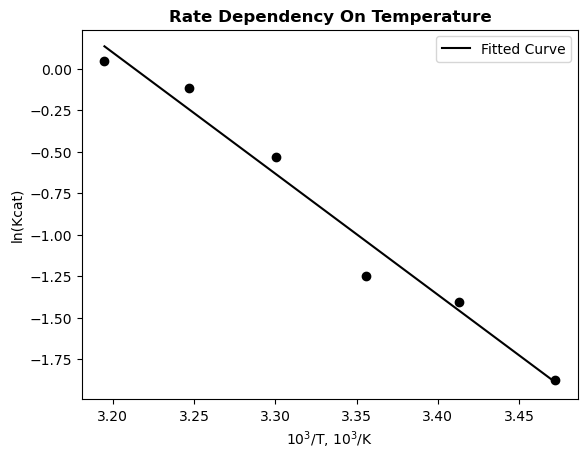

In [12]:

plt.plot(temp_values, fitted_values, color = 'black', label = 'Fitted Curve')
plt.scatter(temp_values, scaled_Kcat, marker = 'o', color = 'black')
plt.title('Rate Dependency On Temperature', fontweight = 'bold')
plt.legend()
plt.ylabel('ln(Kcat)')
plt.xlabel('10$^{3}$/T, 10$^{3}$/K')
plt.savefig('tmp-dependence.png')
plt.show()
